<a href="https://colab.research.google.com/github/rajgupta-github/DeepLearning-with-Python/blob/master/NeuralNetwork/Classification/Diabetes_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import tensorflow as tf
import datetime
import pandas as pd
pd.options.display.float_format = "{:,.2f}".format
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%load_ext tensorboard
import pandas_profiling as pp
from pandas_profiling import ProfileReport
from google.colab import drive
drive.mount('/content/drive')
import warnings
warnings.filterwarnings('ignore')

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
diabetes = pd.read_csv('/content/drive/My Drive/TensorFlow/diabetes.csv')
display(diabetes.head())
display(diabetes.describe())
diabetes.info()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.60,0.63,50,1
1,1,85,66,29,0,26.60,0.35,31,0
2,8,183,64,0,0,23.30,0.67,32,1
3,1,89,66,23,94,28.10,0.17,21,0
4,0,137,40,35,168,43.10,2.29,33,1


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,3.85,120.89,69.11,20.54,79.80,31.99,0.47,33.24,0.35
std,3.37,31.97,19.36,15.95,115.24,7.88,0.33,11.76,0.48
min,0.00,0.00,0.00,0.00,0.00,0.00,0.08,21.00,0.00
25%,1.00,99.00,62.00,0.00,0.00,27.30,0.24,24.00,0.00
50%,3.00,117.00,72.00,23.00,30.50,32.00,0.37,29.00,0.00
75%,6.00,140.25,80.00,32.00,127.25,36.60,0.63,41.00,1.00
max,17.00,199.00,122.00,99.00,846.00,67.10,2.42,81.00,1.00


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [10]:
report = pp.ProfileReport(diabetes)
report.to_file(output_file = '/content/drive/My Drive/TensorFlow/pre_profilereport_diabetes.html')

Profiling Report Observations


*   No Missing Values
*   No Duplicate Rows
*   8 Numerical and 1 Boolean variable
*   Pregnancies has 111 (14.5%) zeros
*   BloodPressure has 35 (4.6%) zeros
*   SkinThickness has 227 (29.6%) zeros
*   Insulin has 374 (48.7%) zeros
*   BMI has 11 (1.4%) zeros

In [5]:
def get_high_corr_features(df, threshold):
    corr_features = set()
    # create the correlation matrix (default to pearson)
    corr_matrix = df.corr()
    for i in range(len(corr_matrix .columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colnamei = corr_matrix.columns[i]
                colnamej = corr_matrix.columns[j]
                corr_features.add( (colnamei,colnamej) )
                # corr_features.append(colnamej)
    return corr_features  
get_high_corr_features(diabetes, 0.4)    

{('Age', 'Pregnancies'), ('Insulin', 'SkinThickness'), ('Outcome', 'Glucose')}

In [6]:
display(diabetes['Outcome'].value_counts())

0    500
1    268
Name: Outcome, dtype: int64

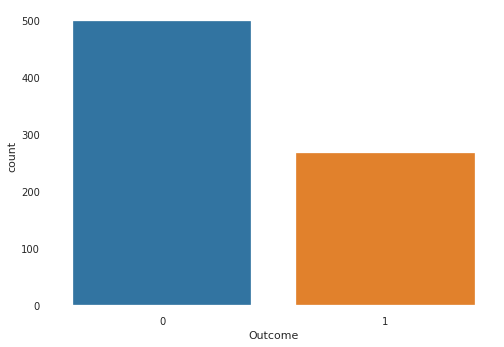

In [12]:
sns.countplot(x = 'Outcome', data = diabetes)


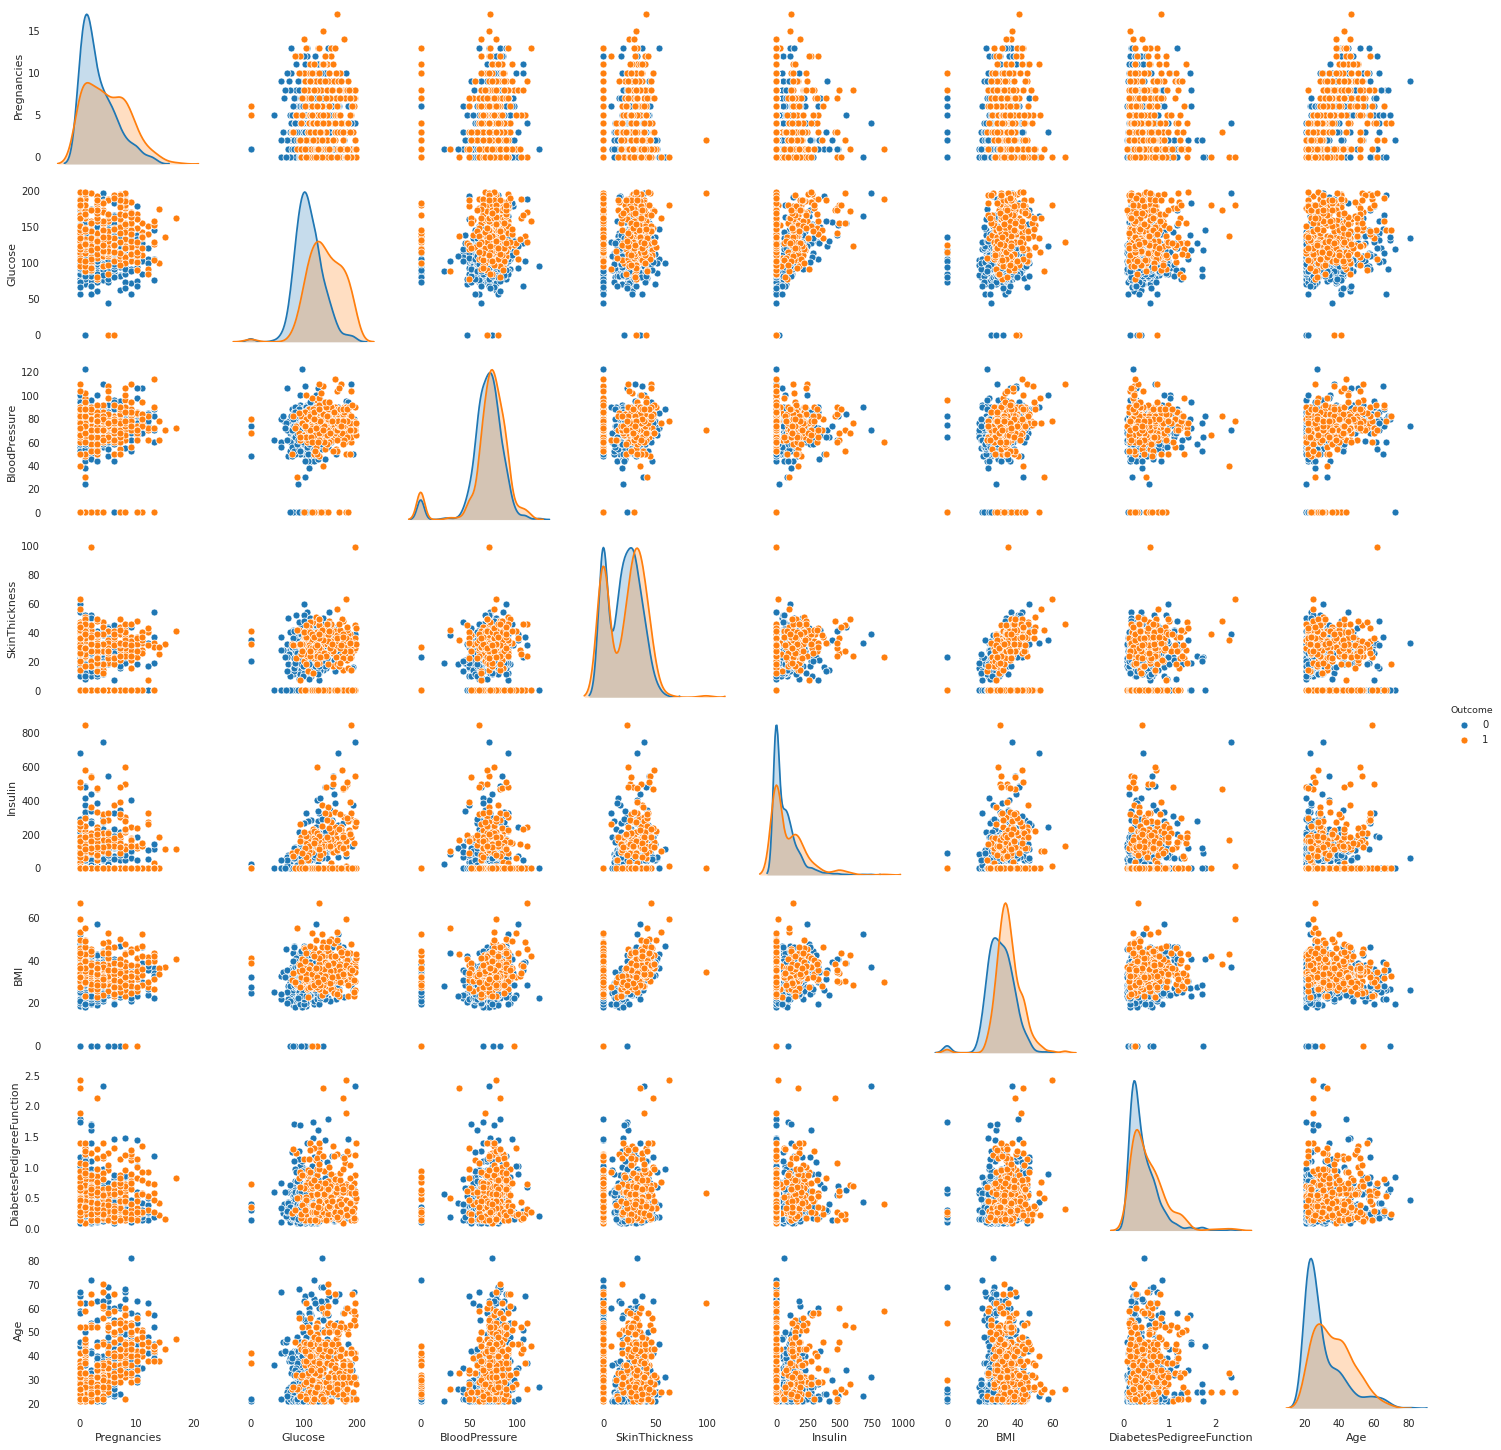

In [11]:
sns.pairplot(diabetes, hue = 'Outcome', vars = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])

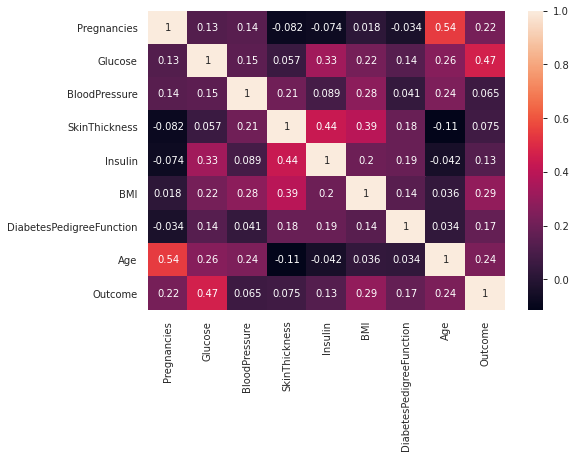

In [13]:
sns.heatmap(diabetes.corr(), annot = True)


In [0]:
X = diabetes.loc[:,diabetes.columns != 'Outcome'].values


In [0]:
y = diabetes['Outcome'].values.reshape(-1,1)

In [0]:
# Feature Scaling is a must in ANN
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [0]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)


In [24]:
X.shape

(768, 8)

In [0]:
classifier = tf.keras.models.Sequential()
classifier.add(tf.keras.layers.Dense(units=400, activation='relu', input_shape=(X.shape[1], )))
classifier.add(tf.keras.layers.Dropout(0.2))

classifier.add(tf.keras.layers.Dense(units=400, activation='relu'))
classifier.add(tf.keras.layers.Dropout(0.2))

classifier.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))


In [26]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 400)               3600      
_________________________________________________________________
dropout (Dropout)            (None, 400)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 400)               160400    
_________________________________________________________________
dropout_1 (Dropout)          (None, 400)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 401       
Total params: 164,401
Trainable params: 164,401
Non-trainable params: 0
_________________________________________________________________


In [0]:
classifier.compile(optimizer='Adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [28]:
epochs_hist = classifier.fit(X_train, y_train, epochs = 200)

Epoch 1/200
20/20 [==============================] - 0s 4ms/step - loss: 0.5501 - accuracy: 0.7117
Epoch 2/200
20/20 [==============================] - 0s 3ms/step - loss: 0.4629 - accuracy: 0.7883
Epoch 3/200
20/20 [==============================] - 0s 3ms/step - loss: 0.4492 - accuracy: 0.7736
Epoch 4/200
20/20 [==============================] - 0s 3ms/step - loss: 0.4541 - accuracy: 0.7785
Epoch 5/200
20/20 [==============================] - 0s 3ms/step - loss: 0.4404 - accuracy: 0.7704
Epoch 6/200
20/20 [==============================] - 0s 3ms/step - loss: 0.4286 - accuracy: 0.7866
Epoch 7/200
20/20 [==============================] - 0s 3ms/step - loss: 0.4346 - accuracy: 0.8062
Epoch 8/200
20/20 [==============================] - 0s 3ms/step - loss: 0.4419 - accuracy: 0.7801
Epoch 9/200
20/20 [==============================] - 0s 4ms/step - loss: 0.4249 - accuracy: 0.7964
Epoch 10/200
20/20 [==============================] - 0s 4ms/step - loss: 0.4180 - accuracy: 0.7964
Epoch 11/

In [0]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)


In [33]:
epochs_hist.history.keys()

dict_keys(['loss', 'accuracy'])

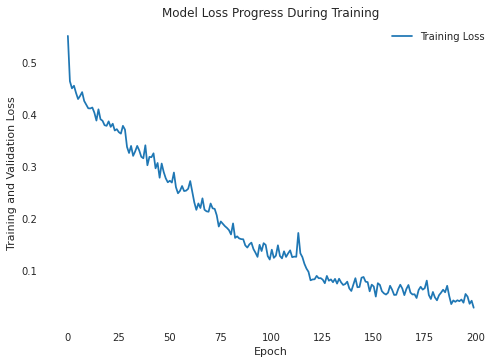

In [34]:
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training and Validation Loss')
plt.legend(['Training Loss'])

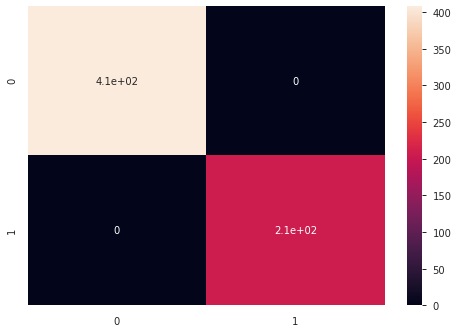

In [35]:
# Training set Performance
from sklearn.metrics import confusion_matrix

y_train_pred = classifier.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
cm = confusion_matrix(y_train, y_train_pred)
sns.heatmap(cm, annot=True)

In [36]:
from sklearn.metrics import classification_report

print(classification_report(y_train_pred, y_train))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00       408
        True       1.00      1.00      1.00       206

    accuracy                           1.00       614
   macro avg       1.00      1.00      1.00       614
weighted avg       1.00      1.00      1.00       614



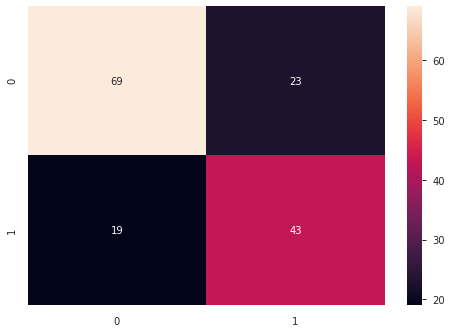

In [37]:
# Testing Set Performance
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)


In [38]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.75      0.77        92
           1       0.65      0.69      0.67        62

    accuracy                           0.73       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.73      0.73      0.73       154

